<div class="alert alert-block alert-info">

[1. Import](#1st-bullet)<br>
- [1.1 Import libraries](#2nd-bullet)<br>
- [1.2 Import the dataset](#3rd-bullet)<br>
 
[2. Data Exploration](#4th-bullet)<br>
- [2.1 Coeherence Check](#5th-bullet)<br>
- [2.2 Outliers](#6th-bullet)<br>   
    - [2.2.1 Manual Filter](#7th-bullet)<br>
    - [2.2.2 IQR method](#8th-bullet)<br>
- [2.3 Missing Values](#9th-bullet)<br> 


</div>

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 1. Import
       
</div>

<a class="anchor" id="2nd-bullet">

### 1.1. Import libraries
    
</a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from pandas_profiling import ProfileReport
import os

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

# Seeting seaborn style
sns.set()

In [6]:
import pyreadstat

<a class="anchor" id="3rd-bullet">

### 1.1. Import dataset
    
</a>

In [7]:
data, meta = pyreadstat.read_sas7bdat('a2z_insurance.sas7bdat')

In [8]:
# DM_profiling_report = ProfileReport(data, title="DM Pandas Profiling Report", explorative=True)
# DM_profiling_report.to_notebook_iframe()

In [9]:
#DM_profiling_report.to_file("DM_profiling_report.html")

<div class="alert alert-block alert-success">

<a class="anchor" id="4rd-bullet">    </a>
## 1. Data Exploration
       
</div>

In [10]:
data.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [11]:
data.set_index('CustID',inplace=True)

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FirstPolYear,10266.0,1991.062634,511.267913,1974.00,1980.00,1986.00,1992.0000,53784.00
BirthYear,10279.0,1968.007783,19.709476,1028.00,1953.00,1968.00,1983.0000,2001.00
MonthSal,10260.0,2506.667057,1157.449634,333.00,1706.00,2501.50,3290.2500,55215.00
GeoLivArea,10295.0,2.709859,1.266291,1.00,1.00,3.00,4.0000,4.00
Children,10275.0,0.706764,0.455268,0.00,0.00,1.00,1.0000,1.00
CustMonVal,10296.0,177.892605,1945.811505,-165680.42,-9.44,186.87,399.7775,11875.89
ClaimsRate,10296.0,0.742772,2.916964,0.00,0.39,0.72,0.9800,256.20
PremMotor,10262.0,300.470252,211.914997,-4.11,190.59,298.61,408.3000,11604.42
PremHousehold,10296.0,210.431192,352.595984,-75.00,49.45,132.80,290.0500,25048.80
PremHealth,10253.0,171.580833,296.405976,-2.11,111.80,162.81,219.8200,28272.00


In [13]:
data[data['EducDeg']==''].sample()

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
7322.0,NaN,1942.0,,3346.0,4.0,0.0,173.47,0.73,139.47,177.8,281.61,120.8,20.67


In [14]:
# replace "" by nans
maybe_nan=['_','',' ','  ','/','%']
data.replace(maybe_nan, np.nan, inplace=True)

# count of missing values
data.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [15]:
data.insert(4,'EducDeg_cat',data['EducDeg'].str[4:])

In [16]:
data.insert(5,'EducDeg_ord',data['EducDeg'].str[0])

In [17]:
data.dtypes

FirstPolYear     float64
BirthYear        float64
EducDeg           object
MonthSal         float64
EducDeg_cat       object
EducDeg_ord       object
GeoLivArea       float64
Children         float64
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
dtype: object

In [18]:
data.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
EducDeg_cat       17
EducDeg_ord       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [19]:
# pd.Int32Dtype() due to nan values
data['FirstPolYear']=data['FirstPolYear'].astype(pd.Int32Dtype())
data['BirthYear']=data['BirthYear'].astype(pd.Int32Dtype())
data['Children']=data['Children'].astype(pd.Int32Dtype())
data['GeoLivArea']=data['GeoLivArea'].astype(pd.Int32Dtype())
data['CustMonVal']=data['CustMonVal'].astype(pd.Float32Dtype())
data['ClaimsRate']=data['ClaimsRate'].astype(pd.Float32Dtype())
data['PremMotor']=data['PremMotor'].astype(pd.Float32Dtype())
data['PremHousehold']=data['PremHousehold'].astype(pd.Float32Dtype())
data['PremHealth']=data['PremHealth'].astype(pd.Float32Dtype())
data['PremLife']=data['PremLife'].astype(pd.Float32Dtype())
data['PremWork']=data['PremWork'].astype(pd.Float32Dtype())

data['EducDeg_cat']=data['EducDeg_cat'].astype(pd.StringDtype())

data['EducDeg_ord'] = data['EducDeg_ord'].astype('float').astype('Int32')


In [20]:
data.dtypes

FirstPolYear       Int32
BirthYear          Int32
EducDeg           object
MonthSal         float64
EducDeg_cat       string
EducDeg_ord        Int32
GeoLivArea         Int32
Children           Int32
CustMonVal       Float32
ClaimsRate       Float32
PremMotor        Float32
PremHousehold    Float32
PremHealth       Float32
PremLife         Float32
PremWork         Float32
dtype: object

In [21]:
# Check for duplicated rows
data[data.duplicated()]#.sum()

,FirstPolYear,BirthYear,EducDeg,MonthSal,EducDeg_cat,EducDeg_ord,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,,,
8014.0,1987,1987,2 - High School,1912.0,High School,2,4,1,290.609985,0.58,202.369995,177.25,306.390015,63.900002,-0.11
8122.0,1977,1974,2 - High School,2204.0,High School,2,4,1,-22.110001,1.0,214.929993,88.900002,266.940002,39.23,42.119999
9554.0,1986,1952,2 - High School,3900.0,High School,2,4,0,-119.349998,1.1,163.029999,481.75,224.820007,94.349998,18.559999


In [22]:
data[data.duplicated()]

,FirstPolYear,BirthYear,EducDeg,MonthSal,EducDeg_cat,EducDeg_ord,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,,,
8014.0,1987,1987,2 - High School,1912.0,High School,2,4,1,290.609985,0.58,202.369995,177.25,306.390015,63.900002,-0.11
8122.0,1977,1974,2 - High School,2204.0,High School,2,4,1,-22.110001,1.0,214.929993,88.900002,266.940002,39.23,42.119999
9554.0,1986,1952,2 - High School,3900.0,High School,2,4,0,-119.349998,1.1,163.029999,481.75,224.820007,94.349998,18.559999


<a class="anchor" id="5th-bullet">

### 2.1. Coeherence Check
    
</a>

In [23]:
print(data[(data['PremMotor']>0) & (data['BirthYear']>(2016-18))])
print(data[(data['PremWork']>0) & (data['BirthYear']>(2016-18))])
print(data[(data['PremHousehold']>0) & (data['BirthYear']>(2016-18))])
# cuidado com os nan FirstPolYear
print(data[data['FirstPolYear']<data['BirthYear']])
print(data[(data['Children']==1) & (data['BirthYear']>(2016-11))])
data[(data['EducDeg']=='4 - PhD') & (data['BirthYear']>(2016-13))]

         FirstPolYear  BirthYear    EducDeg  MonthSal EducDeg_cat  \
CustID                                                              
14.0             1983       2000  1 - Basic    1043.0       Basic   
187.0            1993       1999  1 - Basic    1247.0       Basic   
398.0            1986       2000  1 - Basic     415.0       Basic   
481.0            1984       1999  1 - Basic    1581.0       Basic   
527.0            1982       1999  1 - Basic     840.0       Basic   
...               ...        ...        ...       ...         ...   
9937.0           1989       1999  1 - Basic     918.0       Basic   
9948.0           1987       2000  1 - Basic     422.0       Basic   
10044.0          1983       1999  1 - Basic    1110.0       Basic   
10122.0          1978       1999  1 - Basic     738.0       Basic   
10291.0          1994       1999  1 - Basic     626.0       Basic   

         EducDeg_ord  GeoLivArea  Children  CustMonVal  ClaimsRate  \
CustID                          

,FirstPolYear,BirthYear,EducDeg,MonthSal,EducDeg_cat,EducDeg_ord,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,,,


In [24]:
data[((data['PremMotor']>0) & (data['BirthYear']>(2016-18)))|
((data['PremWork']>0) & (data['BirthYear']>(2016-18)))|
((data['PremHousehold']>0) & (data['BirthYear']>(2016-18)))|
# cuidado com os nan FirstPolYear
(data['FirstPolYear']<data['BirthYear'])|
((data['Children']==1) & (data['BirthYear']>(2016-11)))|
((data['EducDeg']=='4 - PhD') & (data['BirthYear']>(2016-13)))|

((data['EducDeg_cat']=='PhD') & (data['EducDeg_ord']!=4))|
((data['EducDeg_cat']=='Basic') & (data['EducDeg_ord']!=1))|
((data['EducDeg_cat']=='High School') & (data['EducDeg_ord']!=2))|
((data['EducDeg_cat']=='BSc/MSc') & (data['EducDeg_ord']!=3)) 
    ]


,FirstPolYear,BirthYear,EducDeg,MonthSal,EducDeg_cat,EducDeg_ord,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,,,
2.0,1981,1995,2 - High School,677.0,High School,2,4,1,-131.130005,1.12,77.459999,416.200012,116.690002,194.479996,106.129997
14.0,1983,2000,1 - Basic,1043.0,Basic,1,3,1,-75.120003,1.06,44.34,342.850006,127.690002,267.940002,94.459999
19.0,1981,1982,1 - Basic,1414.0,Basic,1,3,1,230.380005,0.71,313.170013,373.399994,121.800003,14.78,72.57
23.0,1976,1986,2 - High School,1495.0,High School,2,1,1,-89.790001,1.08,209.039993,308.950012,192.479996,64.790001,54.900002
41.0,1994,1995,2 - High School,1177.0,High School,2,4,1,121.360001,0.84,52.009998,455.649994,135.470001,146.360001,148.029999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10269.0,1987,1988,3 - BSc/MSc,1414.0,BSc/MSc,3,3,1,50.459999,0.9,129.580002,167.800003,184.479996,165.919998,75.459999
10274.0,1989,1992,2 - High School,1035.0,High School,2,1,1,293.51001,0.58,235.710007,195.600006,103.129997,170.919998,58.119999
10285.0,1980,1987,3 - BSc/MSc,1504.0,BSc/MSc,3,4,1,-1.55,0.96,390.630005,29.450001,179.699997,-6.0,<NA>


In [25]:
# percentage of inconsistent records
1997/10296

0.19395881895881895

In [26]:
data=data[((data['PremMotor']>0) & (data['BirthYear']>(2016-18)))|
            ((data['PremWork']>0) & (data['BirthYear']>(2016-18)))|
            ((data['PremHousehold']>0) & (data['BirthYear']>(2016-18)))|
            # cuidado com os nan FirstPolYear
            (data['FirstPolYear']<data['BirthYear'])|
            ((data['Children']==1) & (data['BirthYear']>(2016-11)))|
            ((data['EducDeg']=='4 - PhD') & (data['BirthYear']>(2016-13)))|

            ((data['EducDeg_cat']=='PhD') & (data['EducDeg_ord']!=4))|
            ((data['EducDeg_cat']=='Basic') & (data['EducDeg_ord']!=1))|
            ((data['EducDeg_cat']=='High School') & (data['EducDeg_ord']!=2))|
            ((data['EducDeg_cat']=='BSc/MSc') & (data['EducDeg_ord']!=3)) 
            ]


<a class="anchor" id="6th-bullet">

### 2.1. Outliers
    
</a>

In [27]:
# metric_features = data.select_dtypes(include=np.number)
# categorical_features = data.select_dtypes(exclude=np.number)

non_metric_features = ["EducDeg","Children","FirstPolYear","EducDeg_cat","EducDeg_ord",'GeoLivArea',]
metric_features =data.columns.drop(non_metric_features).to_list()
#metric_features = data.columns.drop(non_metric_features).to_list()
metric_features

['BirthYear',
 'MonthSal',
 'CustMonVal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork']

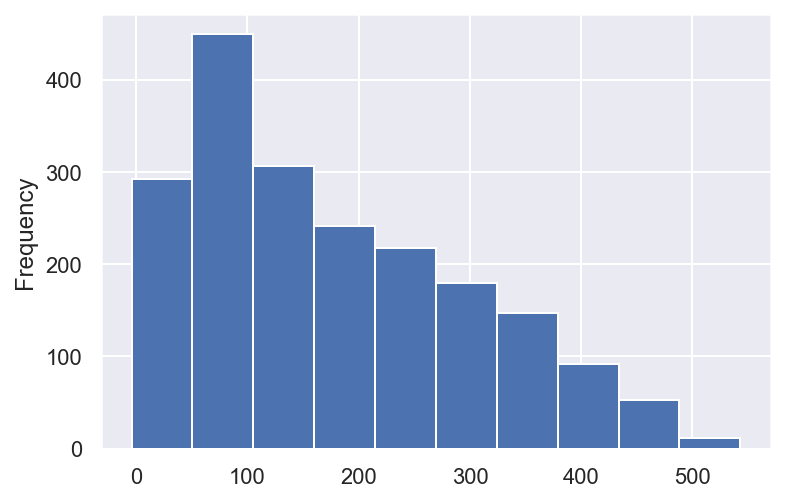

In [28]:
%matplotlib inline
data['PremMotor'].plot.hist()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

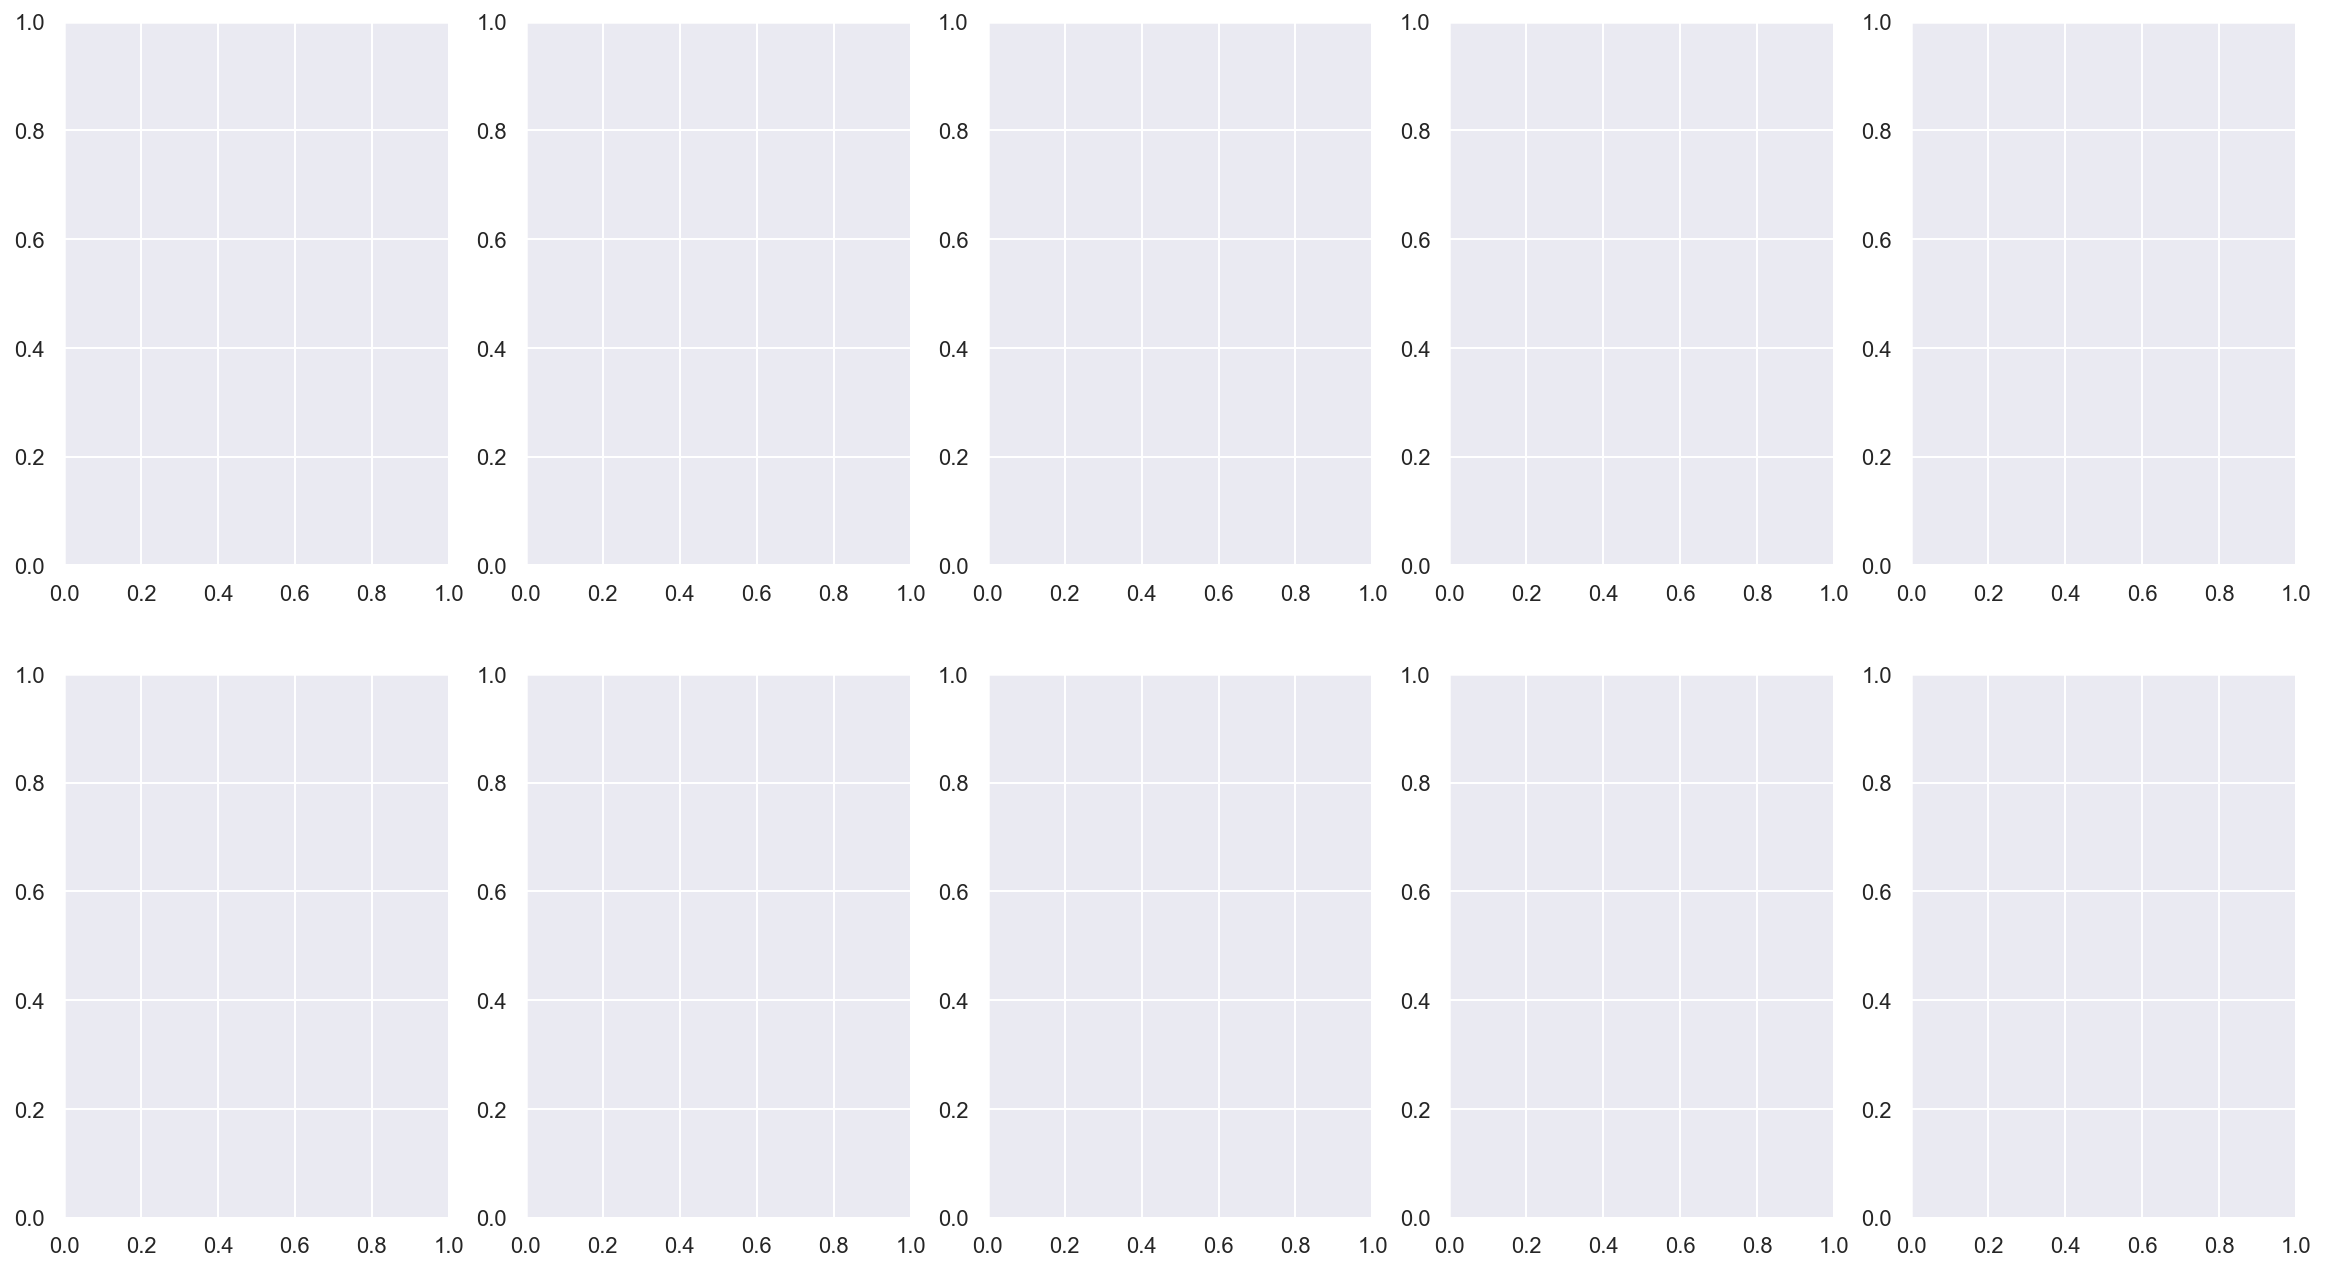

In [29]:
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))
plt.rcParams['figure.figsize'] = (12, 12)
for i,metric in enumerate(metric_features):
         a = np.array(data[metric])
         axes[i].hist(a, bins=np.linspace(0, 10, 11))
plt.show()

TypeError: boolean value of NA is ambiguous

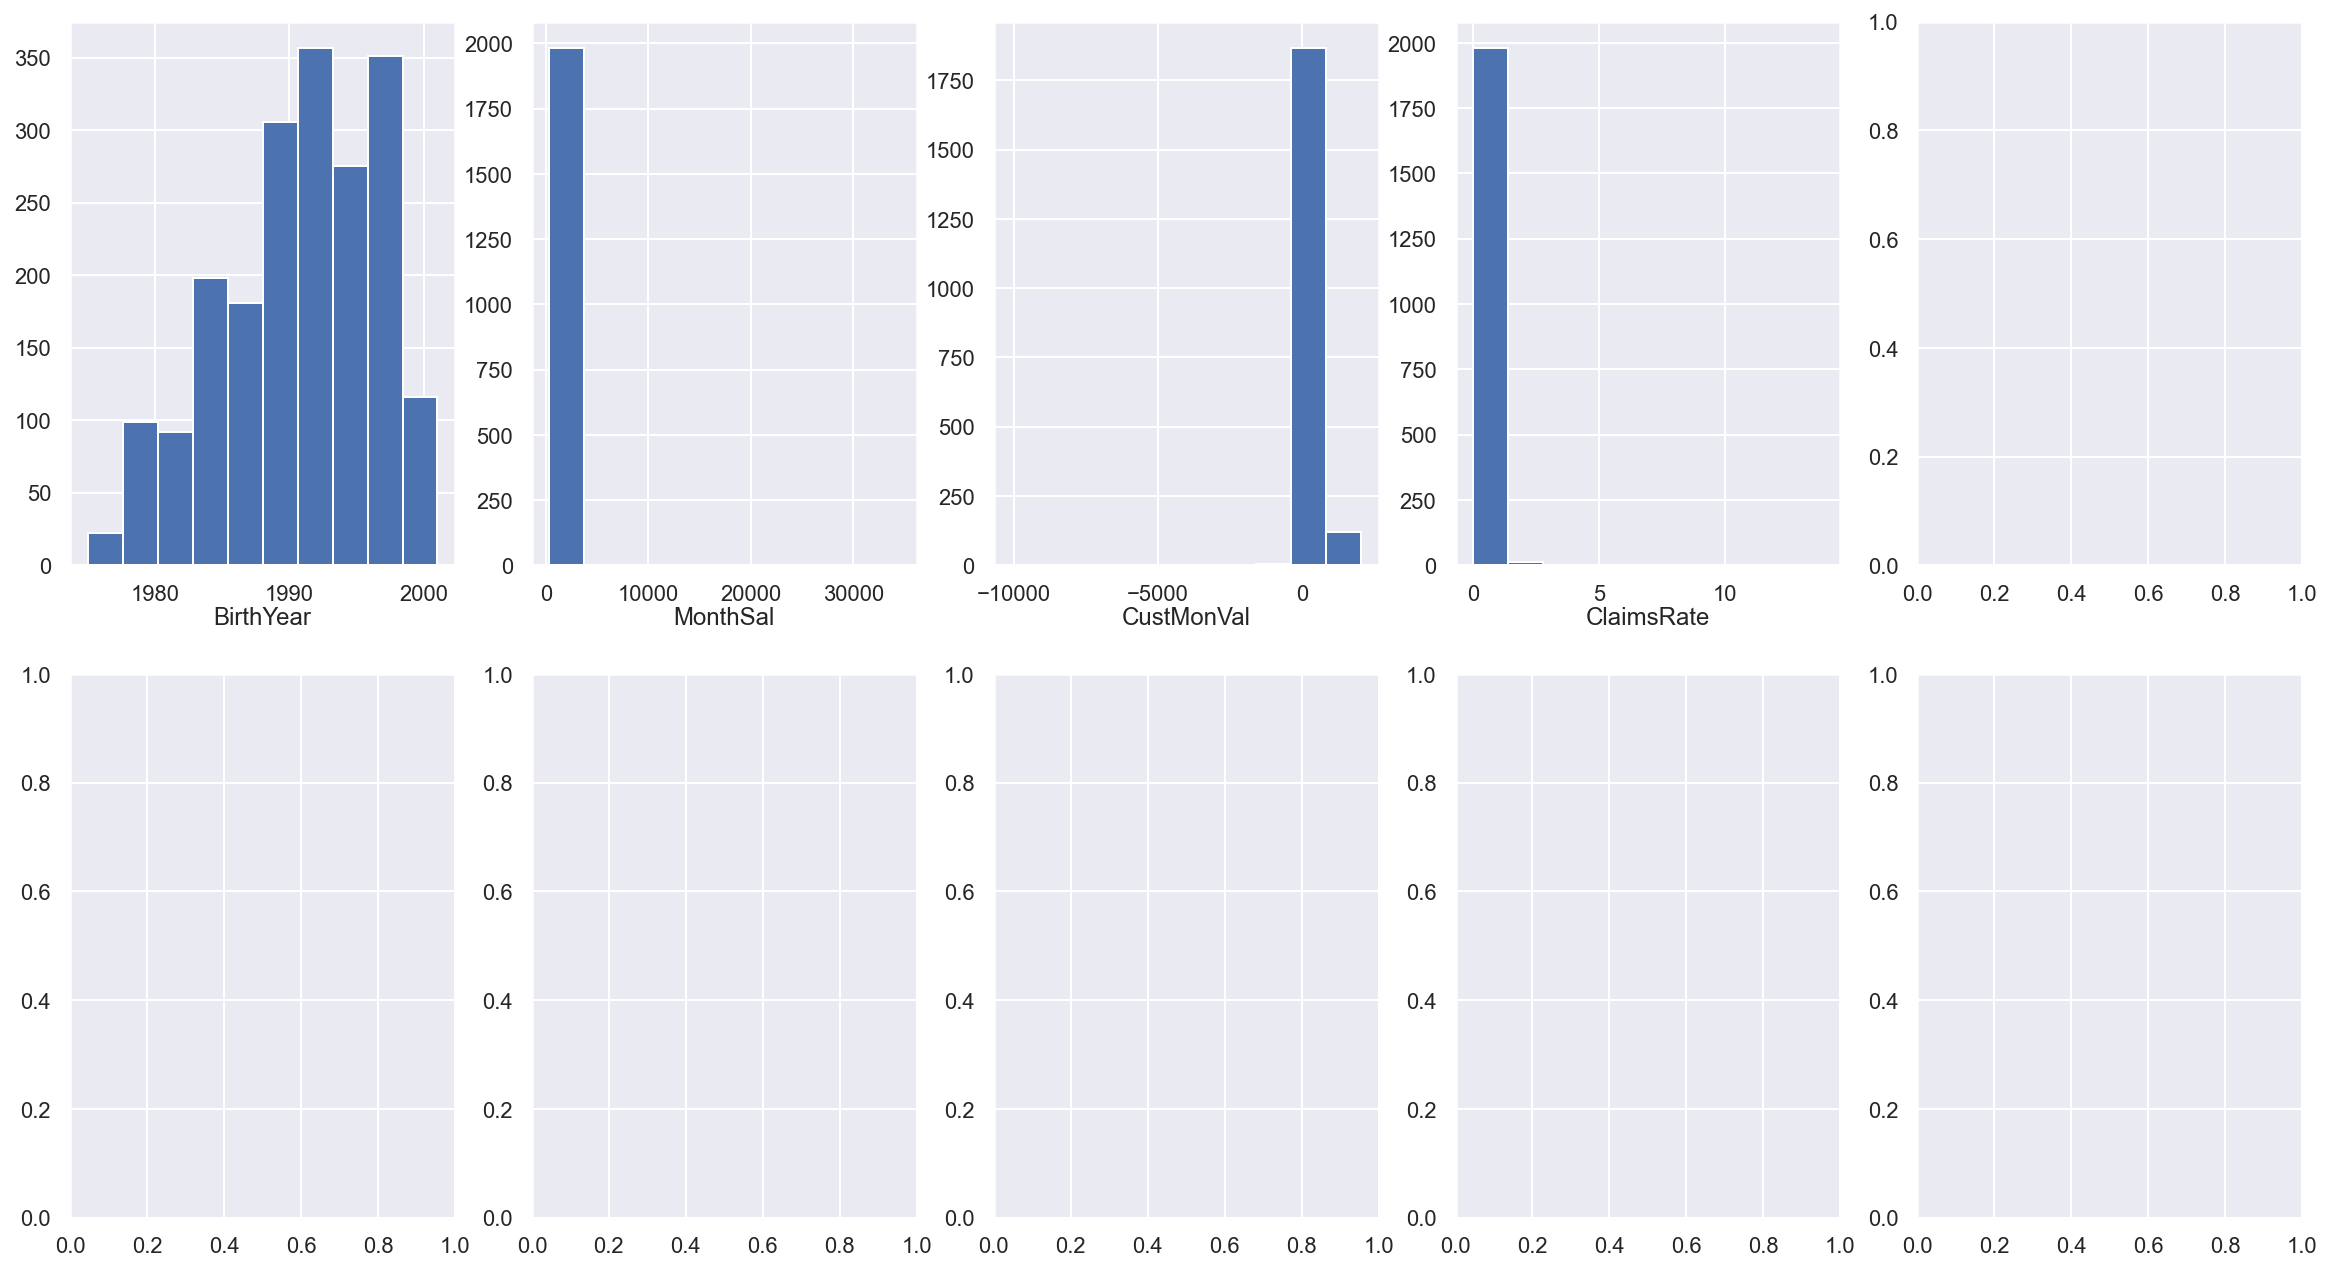

In [30]:
%matplotlib inline

sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(data[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

Text(0.5, -0.2, 'CustMonVal')

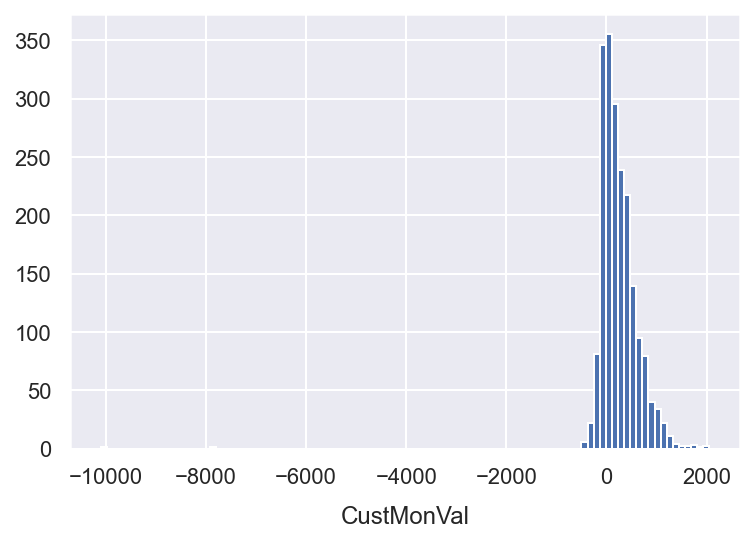

In [31]:
plt.hist(data["CustMonVal"], bins=100)  
plt.title("CustMonVal", y=-0.2)

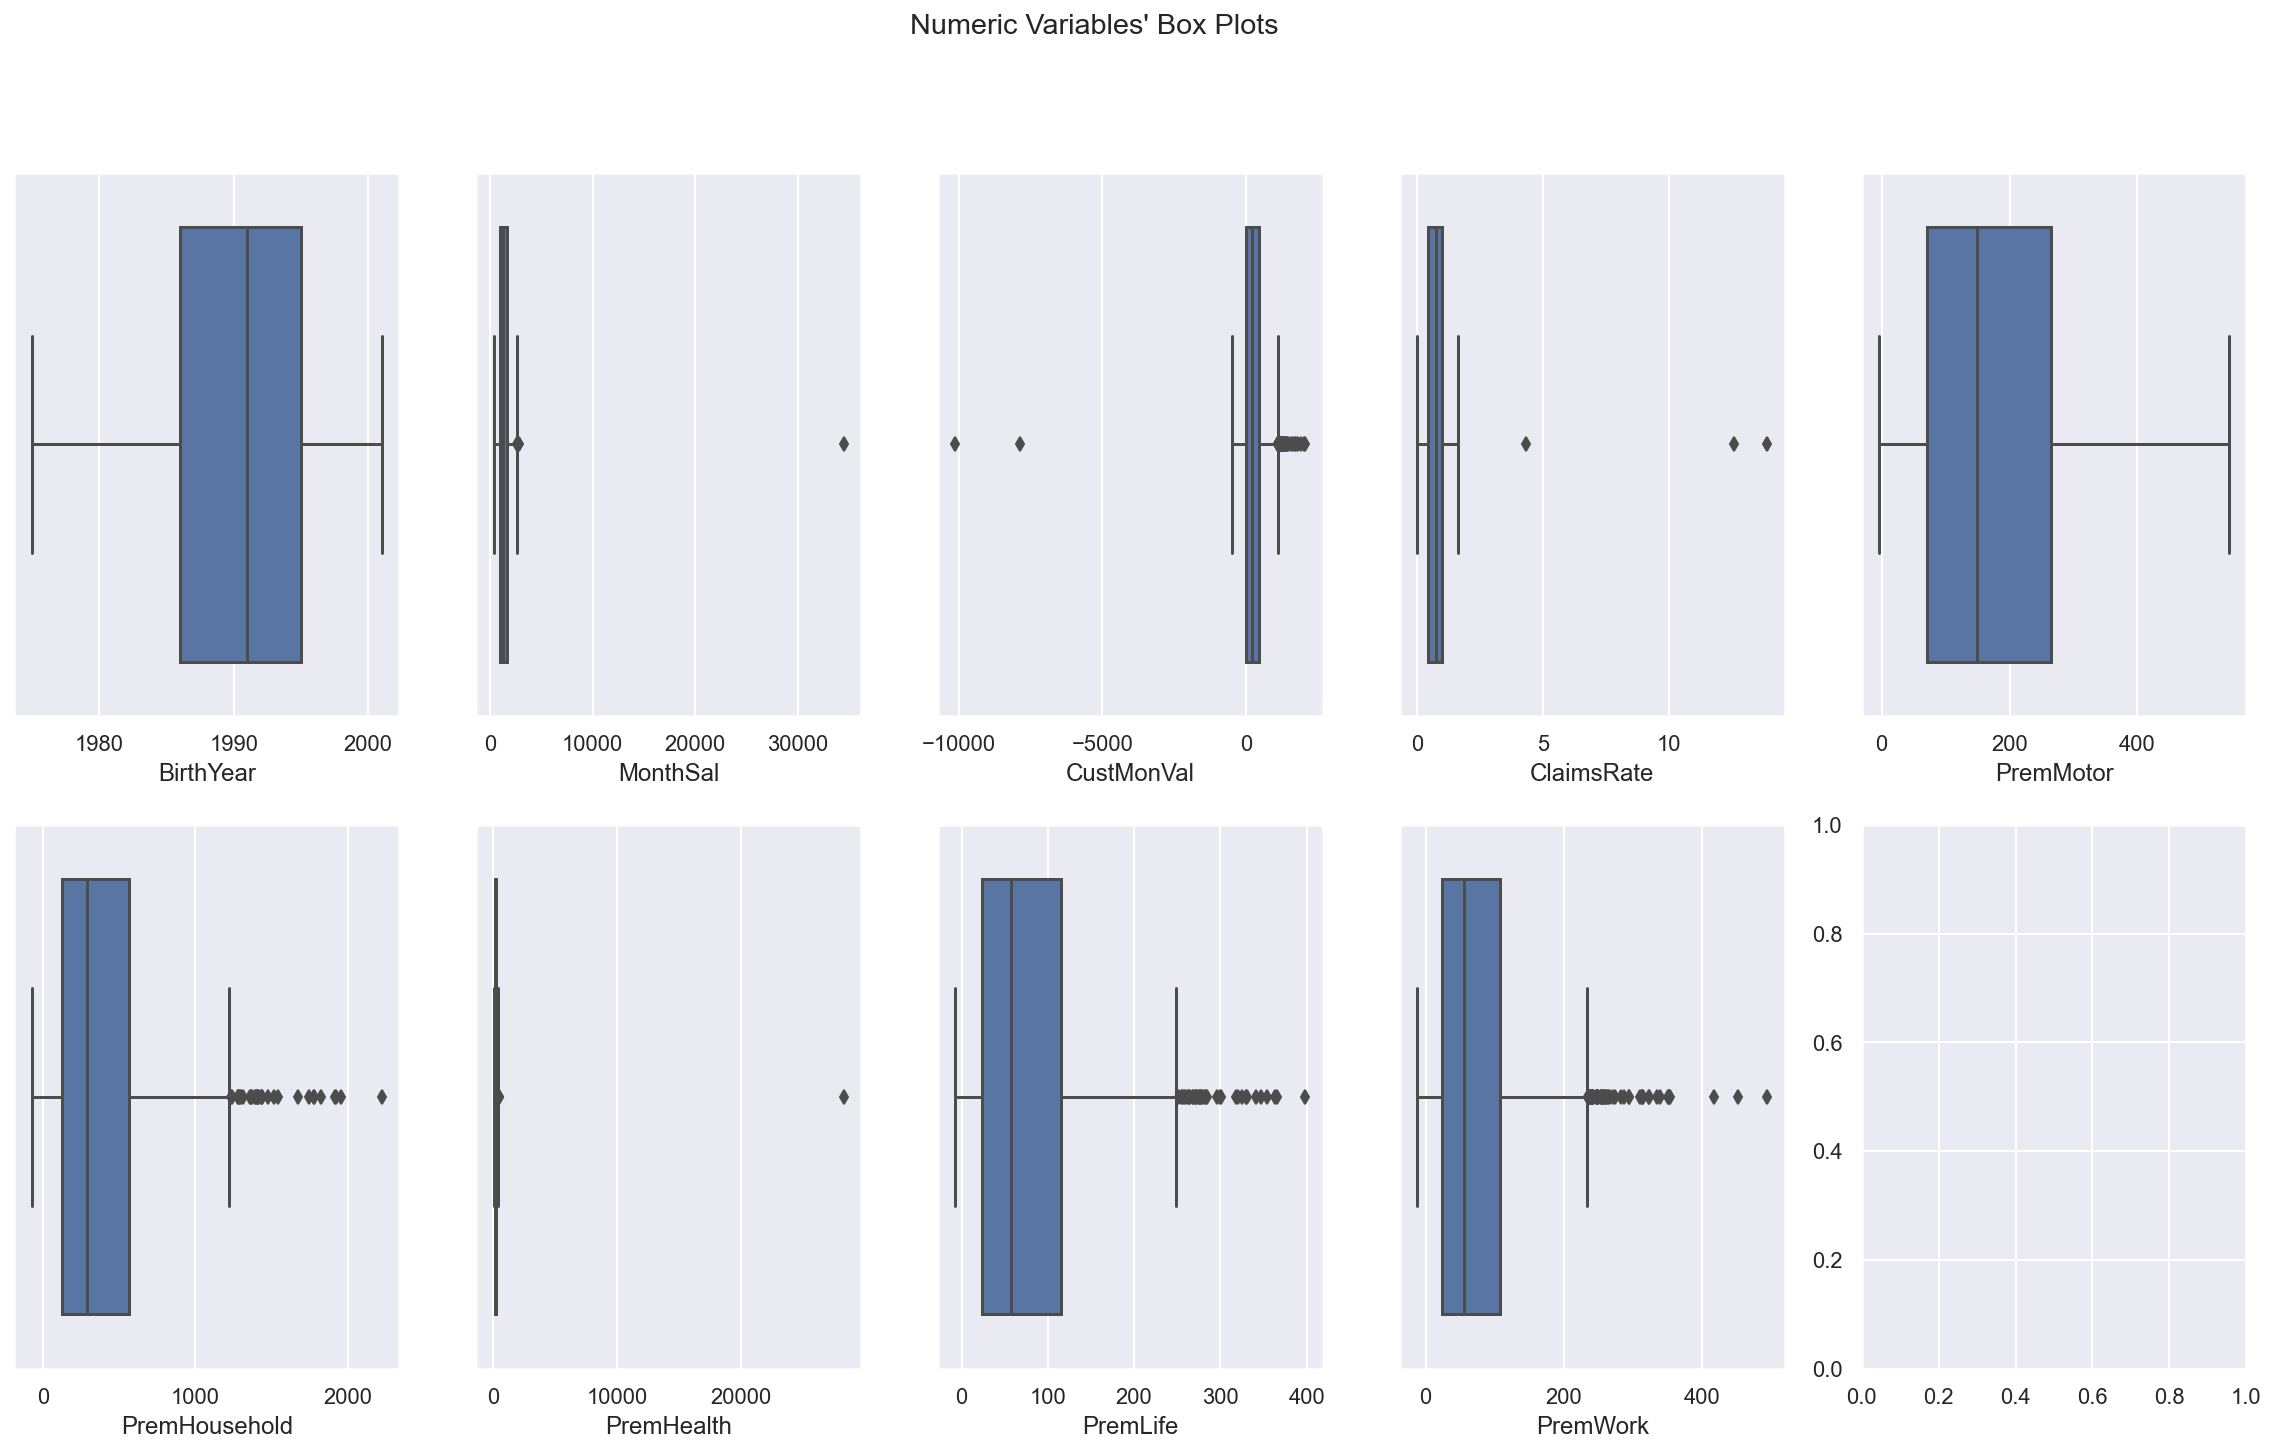

In [32]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

#plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

<a class="anchor" id="7th-bullet">

### 2.1.1. Manual Filter
    
</a>

In [ ]:
# This may vary from session to session, and is prone to varying interpretations.
# A simple example is provided below:

filters1 = (
    (data['house_keeping']<=50)
    &
    (data['kitchen']<=40)
    &
    (data['toys']<=35)
    &
    (data['education']!='OldSchool')
)

df_1 = df[filters1]

In [34]:
print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / df_original.shape[0], 4))

NameError: name 'df_1' is not defined

<a class="anchor" id="8th-bullet">

### 2.2.2  IQR Method
    
</a>

In [21]:
# NOT THE BEST METHOD WHEN HAVING MANY FEATURES

q25 = data.quantile(.25)
q75 = data.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df[metric].between(llim, ulim, inclusive=True))

filters2 = pd.Series(np.all(filters2, 0))
df_2 = df[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / df_original.shape[0], 4))

NameError: name 'metric_features' is not defined

## FOR NORMAL DISTRIBUTIONS 3 DESVIOS PADRAO

<a class="anchor" id="9th-bullet">

### 2.1. Missing Values
    
</a>